# Tarea #3

In [1]:
import pandas as pd
import numpy as np
import io
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter, MultipleLocator
from matplotlib.patches import ArrowStyle, FancyArrowPatch
import matplotlib.font_manager as fm
from matplotlib import lines
import matplotlib.patches as patches
import mpltern
import ternary

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


In [2]:
def read_list_csv(carpeta, formato='.csv'):
    list_files = []
    for item in carpeta.rglob('*'):
        if item.is_file():
            if str(item).endswith(formato):
                list_files += ['.\\' + str(item)]

    return list_files

ruta_admision = Path('./datos_ext/admision')
ruta_inscripcion = Path('./datos_ext/inscripcion')
ruta_matricula = Path('./datos_ext/matricula')
ruta_postulacion = Path('./datos_ext/postulacion')

list_files_admision = read_list_csv(ruta_admision)
list_files_inscripcion = read_list_csv(ruta_inscripcion)
list_files_matricula = read_list_csv(ruta_matricula)
list_files_postulacion = read_list_csv(ruta_postulacion)

list_files_admision_xlsx = read_list_csv(ruta_admision, formato='.xlsx')
list_files_inscripcion_xlsx = read_list_csv(ruta_inscripcion, formato='.xlsx')
list_files_matricula_xlsx = read_list_csv(ruta_matricula, formato='.xlsx')
list_files_postulacion_xlsx = read_list_csv(ruta_postulacion, formato='.xlsx')

In [3]:
list_admision_2014_2023 = list_files_admision[10:-2]
cols_admision_2014_2023 = [
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA']  
]

list_files_matricula_2014_2023 = list_files_matricula[10:]
cols_matricula_2014_2023 = [
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
]

list_files_matricula_xlsx_2014_2023 = list_files_matricula_xlsx[9:]
list_sheet_matricula = [
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - Oferta académica'
]

cols_matricula_xlsx_2014_2023 = [
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD']
]

In [4]:
cols_admision = ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA', 'AÑO']
cols_matricula = ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND', 'AÑO', 'UNIVERSIDAD']
df_admision = pd.DataFrame(columns=cols_admision)
df_matricula = pd.DataFrame(columns=cols_matricula)
gdep_map = {1: 'Particular pagado', 2: 'Particular subvencionado', 3: 'Municipal'}

for k in range(len(cols_admision_2014_2023)):
    df = pd.read_csv(list_admision_2014_2023[k], sep=';', low_memory=False)[cols_admision_2014_2023[k]]
    df.columns = cols_admision[:-1]
    df['AÑO'] = 2014 + k
    df_admision = pd.concat([df_admision, df])

    df = pd.read_csv(list_files_matricula_2014_2023[k], sep=';', low_memory=False)[cols_matricula_2014_2023[k]]
    df.columns = cols_matricula[:-2]
    df['AÑO'] = 2014 + k

    df_aux = pd.read_excel(list_files_matricula_xlsx_2014_2023[k], sheet_name=list_sheet_matricula[k])[cols_matricula_xlsx_2014_2023[k]]
    df_aux.columns = ['CODIGO', 'UNIVERSIDAD']
    universidad_map = {df_aux.drop_duplicates('CODIGO').iloc[i]['CODIGO']:df_aux.drop_duplicates('CODIGO').iloc[i]['UNIVERSIDAD']  for i in range(df_aux.drop_duplicates('CODIGO').shape[0])}
    df['UNIVERSIDAD'] = df['CODIGO'].map(universidad_map)
    df = df.dropna()

    df_matricula = pd.concat([df_matricula, df])

df_admision_matricula = df_matricula.merge(df_admision, how='left', on=['ID_aux', 'AÑO'])
df_admision_matricula = df_admision_matricula[~df_admision_matricula['GRUPO_DEPENDENCIA'].isna()]
df_admision_matricula = df_admision_matricula[df_admision_matricula['GRUPO_DEPENDENCIA']>0]
df_admision_matricula = df_admision_matricula[df_admision_matricula['GRUPO_DEPENDENCIA']<4]
df_admision_matricula['GRUPO_DEPENDENCIA'] = df_admision_matricula['GRUPO_DEPENDENCIA'].astype(int)
df_admision_matricula['GRUPO_DEPENDENCIA'] = df_admision_matricula['GRUPO_DEPENDENCIA'].map(gdep_map)
df_admision_matricula['Particular pagado'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Particular pagado')*1
df_admision_matricula['Municipal'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Municipal')*1
df_admision_matricula['Particular subvencionado'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Particular subvencionado')*1
df_admision_matricula['PTJE_POND'] = df_admision_matricula['PTJE_POND'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PROMEDIO_NOTAS'] = df_admision_matricula['PROMEDIO_NOTAS'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PTJE_NEM'] = df_admision_matricula['PTJE_NEM'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PTJE_RANKING'] = df_admision_matricula['PTJE_RANKING'].astype(str).str.replace(',', '.').astype(float)

df_admision_matricula['UNIVERSIDAD'] = df_admision_matricula['UNIVERSIDAD']\
    .apply(lambda x: 'UNIVERSIDAD ADOLFO IBAÑEZ' if x=='UNIVERSIDAD ADOLFO IBAÃ‘EZ' else x)\
    .apply(lambda x: 'UNIVERSIDAD DE LAS AMERICAS' if x=='UNIVERSIDAD DE LAS AMÃ‰RICAS' else x)

df_admision_matricula['PROMEDIO_NOTAS'] = df_admision_matricula['PROMEDIO_NOTAS'].apply(lambda x: x/100 if x>100 else x)
df_admision_matricula = df_admision_matricula[df_admision_matricula['PROMEDIO_NOTAS']>0]

In [5]:
df_admision_matricula_group = df_admision_matricula.groupby(['AÑO', 'UNIVERSIDAD'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].mean().sort_values(['UNIVERSIDAD', 'AÑO'])
df_admision_matricula_group_all = df_admision_matricula.groupby(['AÑO'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].mean().sort_values(['AÑO'])
df_admision_matricula_group_all['UNIVERSIDAD'] = 'ALL'

uni_top = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE CHILE', 'UNIVERSIDAD DE CONCEPCION', 'UNIVERSIDAD ADOLFO IBAÑEZ', 'UNIVERSIDAD DE SANTIAGO DE CHILE']
df_admision_matricula_group_all_top = df_admision_matricula[df_admision_matricula['UNIVERSIDAD'].isin(uni_top)].groupby(['AÑO'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].mean().sort_values(['AÑO'])
df_admision_matricula_group_all_top['UNIVERSIDAD'] = 'TOP'


In [6]:
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:001A47-33.3:004C70-66.6:DDDD00-100:990000
    (0.000, (0.000, 0.102, 0.278)),
    (0.333, (0.000, 0.298, 0.439)),
    (0.666, (0.867, 0.867, 0.000)),
    (1.000, (0.600, 0.000, 0.000))))


#my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
#    # Edit this gradient at https://eltos.github.io/gradient/#0:00BFC4-33:00BA38-66:B7D135-100:F8766D
#    (0.000, (0.000, 0.749, 0.769)),
#    (0.330, (0.000, 0.729, 0.220)),
#    (0.660, (0.718, 0.820, 0.208)),
#    (1.000, (0.973, 0.463, 0.427))))


gris_null = "#B5B4A6"
my_gradient.set_bad(gris_null)

In [7]:
def rgba_to_hex(rgba):
    r, g, b, a = rgba  # Extraemos los valores de RGBA
    return '#{:02x}{:02x}{:02x}{:02x}'.format(int(r * 255), int(g * 255), int(b * 255), int(a * 255))

rgba_to_hex(my_gradient(0))

'#001a46ff'

In [8]:
aux = dict({(i, j, k): k for i, j, k in ternary.helpers.simplex_iterator(100)})

In [9]:
my_gradient(0)[:-1]

(0.0, 0.102, 0.278)

In [10]:
df_admision_mean_uni = df_admision_matricula_group.groupby('UNIVERSIDAD').mean()
df_admision_mean_uni.columns = df_admision_mean_uni.columns.str.replace(' ', '_')
unis_municipal = df_admision_mean_uni.query('Municipal >= 0.5').index.tolist()
unis_pp = df_admision_mean_uni.query('Particular_pagado >= 0.5').index.tolist()
unis_ps = df_admision_mean_uni.query('Particular_subvencionado >= 0.5').index.tolist()
unis_all = df_admision_mean_uni[~df_admision_mean_uni.index.isin(unis_municipal + unis_pp + unis_ps)].index.tolist()

In [11]:
my_gradient(0.25)

(0.0, 0.24972419478301833, 0.39934487428605075, 1.0)

In [12]:
# Ruta al archivo de fuente
font_path_latoBlack = 'Lato/Lato-Black.ttf' 
font_path_latoB = 'Lato/Lato-Bold.ttf' 
font_path_latoR = 'Lato/Lato-Regular.ttf'
font_path_latoI = 'Lato/Lato-Italic.ttf'

# Cargar la fuente desde el archivo
prop_latoBlack = fm.FontProperties(fname=font_path_latoBlack)
prop_latoB = fm.FontProperties(fname=font_path_latoB)
prop_latoR = fm.FontProperties(fname=font_path_latoR)
prop_latoI = fm.FontProperties(fname=font_path_latoI)

# Definicion de colores
col_blue_1 = (20,110,160,255)
col_cyan_1 = (50,192,210,255)
col_yellow_1 = (224,177,101,255)
col_wine_1 = (151,60,76,255)
col_green_1 = (0,150,158,255)
col_wine_2 = (171,138,149,255)

col_salmon_1 = (221,109,109,255)
col_yellow_2 = (237,162,34,255)
col_green_2 = (180,187,60,255)
col_wine_3 = (155,97,128,255)
col_gray_1 = (130,129,116,255)
col_blue_2 = (0,89,124,255)

col_black = (3,2,8,255)
col_white = (225,232,234,255)
col_gray_text = (58,84,95,255)
col_gray = (170,190,199,255)
col_gray_dark = (108,135,147,255)


colorGen_1 = tuple([i/255 for i in col_wine_3]) #my_gradient(0.25)
colorPP_1 = tuple([i/255 for i in col_salmon_1]) #my_gradient(0.7)
colorMun_1 = tuple([i/255 for i in col_yellow_1]) #my_gradient(0.5)
colorPS_1 = tuple([i/255 for i in col_green_1])# my_gradient(0.999)

#colorGen_1 = mod_color_op(my_gradient(0.25), intensidad=.9, alpha=1.)
#colorPP_1 = mod_color_op(my_gradient(0.7), intensidad=.9, alpha=1.)
#colorMun_1 = mod_color_op(my_gradient(0.5), intensidad=.9, alpha=1.)
#colorPS_1 = mod_color_op(my_gradient(0.999), intensidad=.9, alpha=1.)

colorBlack = tuple([i/255 for i in col_black])
colorWhite= tuple([i/255 for i in col_white])
colorGrayText = tuple([i/255 for i in col_gray_text])
colorGray = tuple([i/255 for i in col_gray])
colorGrayDark = tuple([i/255 for i in col_gray_dark])


# Funciones
def for_uni_scatter(df_admision_matricula_group, tax, uni, color, edgecolor='w', alpha=1.0):
    for k in range(len(uni)):
        data = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]][['Municipal', 'Particular pagado', 'Particular subvencionado']]
        data_size = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]]['PROMEDIO_NOTAS']-4
        tax.scatter(data['Particular pagado'], data['Particular subvencionado'], data['Municipal'], color=color, s=np.exp(data_size*2.2), edgecolor=edgecolor, alpha=alpha)

def barh_grupo_dep(fig, df, uni, pos=[0.6, 0.85, 0.1, 0.01], pos_text=[[0,0,0],[0,0,0]], 
                   text_title=None, pos_title=[0,0], ha_title='center', va_title='center', 
                   color=[colorPP_1, colorMun_1, colorPS_1], stext=10):
    df = df[df['UNIVERSIDAD'].isin(uni)].drop(columns='UNIVERSIDAD')
    df['AÑO'] = df['AÑO'].astype(int)
    df = df.set_index('AÑO')
    df = pd.DataFrame(df.mean()).T

    if text_title==None:
        text_title=uni[0]
        text_title = text_title.title()

    df_pp = int(np.round(df['Particular pagado'] * 100))
    df_ps = int(np.round(df['Particular subvencionado'] * 100))
    df_m = 100 - df_pp - df_ps

    bar_ax = fig.add_axes(pos)
    bar_ax.barh(df.index, df['Particular pagado'], label='Particular pagado', color=color[0])
    bar_ax.text(df['Particular pagado'].values[0]*0.5 + pos_text[0][0], pos_text[1][0], 
                f"{df_pp}%",
                ha='center', va='bottom', fontsize=stext, color=colorGrayText, fontproperties=prop_latoR)#color[0], weight=900)
    bar_ax.barh(df.index, df['Municipal'], left=df['Particular pagado'] ,label='Municipal', color=color[1])
    bar_ax.text(df['Municipal'].values[0]*0.5 + df['Particular pagado'].values[0] + pos_text[0][1], pos_text[1][1], 
                f"{df_m}%", 
                ha='center', va='top', fontsize=stext, color=colorGrayText, fontproperties=prop_latoR)#color[1], weight=900)
    bar_ax.barh(df.index, df['Particular subvencionado'], left=df['Particular pagado']+df['Municipal'],label='Particular subvencionado', color=color[2])
    bar_ax.text(df['Particular subvencionado'].values[0]*0.5 + df['Particular pagado'].values[0] + df['Municipal'].values[0] + pos_text[0][2], pos_text[1][2], 
            f"{df_ps}%", 
            ha='center', va='bottom', fontsize=stext, color=colorGrayText, fontproperties=prop_latoR)#color[1], weight=900)
    
    bar_ax.text(0.5+pos_title[0], 1.8+pos_title[1], text_title, ha=ha_title, va=va_title, fontsize=stext,
                color=colorGrayText, fontproperties=prop_latoR)#color[1], weight=900)
    bar_ax.set_axis_off()

def drawCircle(fig, pos=[0.6, 0.85, 0.1, 0.01], color='k', alpha=0.9, fc='#ffffff', alpha_fc=0., r=1.0):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta) * r
    y = np.sin(theta) * r
    circle_ax = fig.add_axes(pos)
    circle_ax.plot(x, y, color=color, alpha=alpha)
    circle_ax.fill(x, y, color=fc, alpha=alpha_fc)  # Para rellenar el círculo
    circle_ax.set_xlim(-1.5, 1.5)
    circle_ax.set_ylim(-1.5, 1.5)
    circle_ax.set_aspect('equal', adjustable='box')
    circle_ax.set_axis_off()

def drawCircleText(fig, pos=[0.6, 0.85, 0.1, 0.1], color='k', alpha=0.9, fc='#ffffff', alpha_fc=0., r=1.0,
                   text_title='', ha_title='center', va_title='center', stext=8, pos_text=(0,0)):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta) * r
    y = np.sin(theta) * r
    circle_ax = fig.add_axes(pos)
    circle_ax.plot(x, y, color=color, alpha=alpha, linewidth=0.8)
    circle_ax.fill(x, y, color=fc, alpha=alpha_fc)  # Para rellenar el círculo
    circle_ax.set_xlim(-1.5, 1.5)
    circle_ax.set_ylim(-1.5, 1.5)
    circle_ax.text(pos_text[0], pos_text[1], text_title, ha=ha_title, va=va_title,
                   fontsize=stext, color=colorGrayText, fontproperties=prop_latoR)
    circle_ax.set_aspect('equal', adjustable='box')
    circle_ax.set_axis_off()

def drawLine(fig, pos=[0.6, 0.85, 0.5, 0.5], points=[[0,0], [10,10]], color='k', alpha=0.9, margin=0.1, point_size=10):
    line_ax = fig.add_axes(pos)
    line_ax.plot(points[0], points[1], color=color, alpha=alpha)
    line_ax.scatter(points[0][-1], points[1][-1], color=color, alpha=alpha, s=point_size)

    line_ax.set_xlim(np.min(points[0])-margin, np.max(points[0])+margin)
    line_ax.set_ylim(np.min(points[1])-margin, np.max(points[1])+margin)
    #line_ax.set_aspect('equal', adjustable='box')
    line_ax.set_axis_off()

def mod_color_op(color, intensidad=1., alpha=1.):
    return (color[0] * intensidad, color[1] * intensidad, color[2] * intensidad, alpha)

def axis_label_arrow(tax, msje, angle=-60, pos_text='left',
                     ta = np.array([0.96, 0.02,  0.04]), tb = np.array([1.0, 0.02,  0.0]),
                     pos_arrow=(-0.045, 0.,0.045), color=colorPP_1):

    arrowstyle = ArrowStyle('simple', head_length=10, head_width=5)
    kwargs_arrow = {'transform': tax.transAxes, 'arrowstyle': arrowstyle, 'linewidth': 1, 'clip_on': False, 'zorder': -10}

    f = tax.transAxesProjection.transform
    tarrow = FancyArrowPatch(f(ta), f(tb), ec=color, fc=color, **kwargs_arrow)
    tax.add_patch(tarrow)
    kwargs_label = {'transform': tax.transTernaryAxes, 'backgroundcolor': '#FFFFFF00', 'size':9, 'fontweight':'bold',
                    'ha': pos_text, 'va': 'center', 'rotation_mode': 'anchor', 'zorder': -9, 'fontproperties': prop_latoBlack}
    tpos = tb + pos_arrow
    tax.text(*tpos, msje, color=color, rotation=angle, **kwargs_label)

def title_fig(fig, ax, posx_line_title, posy_line_title, color_text, color_line, text,
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=14, fontproperties=prop_latoBlack):
    fig.add_artist(
        lines.Line2D(posx_line_title, posy_line_title, lw=lw_line_title, 
                    color=color_line, solid_capstyle="butt", 
                    transform=ax.transAxes))
    fig.text(pos_x0_title, pos_y0_title, text,
            ha='left', va='top', fontsize=fontsize, weight=700, 
            color=color_text, fontproperties=fontproperties)

def draw_fig_colors(fig, ax, colorGen_1, colorPP_1, colorMun_1, colorPS_1, colorBlack, colorGrayText, colorGray):
    tax = fig.add_subplot(111, projection='ternary', ternary_sum=100.0)

    # Ajuste parametros eje ternario
    tax.spines[:].set_visible(False)
    tax.spines[:].set_color(colorGrayText)
    tax.tick_params(axis='t', colors=colorPP_1, labelsize=8)
    tax.tick_params(axis='r', colors=colorMun_1, labelsize=8)
    tax.tick_params(axis='l', colors=colorPS_1, labelsize=8)

    axis_label_arrow(tax, 'Particular pagado', angle=-60, pos_text='left',
                    ta = np.array([0.96, 0.02, 0.04]), tb = np.array([1.0, 0.02, 0.0]), pos_arrow=(-0.045, 0., 0.045), color=colorPP_1)
    axis_label_arrow(tax, 'Municipal', angle=0, pos_text='right',
                    ta = np.array([0.02, 0.04, 0.96]), tb = np.array([0.02, 0.00, 1.0]), pos_arrow=(0.0, 0.045, -0.0), color=colorMun_1)
    axis_label_arrow(tax, 'Particular subvencionado', angle=60, pos_text='left',
                    ta = np.array([0.04, 0.96, 0.02]), tb = np.array([0.00, 1.0, 0.02]), pos_arrow=(0.045, -0.045, 0.0), color=colorPS_1)

    tax.axtspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorPP_1))
    tax.axlspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorPS_1))
    tax.axrspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorMun_1))

    tax.taxis.set_major_formatter(PercentFormatter())
    tax.laxis.set_major_formatter(PercentFormatter())
    tax.raxis.set_major_formatter(PercentFormatter())

    tax.taxis.set_major_locator(MultipleLocator(25))
    tax.laxis.set_major_locator(MultipleLocator(25))
    tax.raxis.set_major_locator(MultipleLocator(25))

    # Filtro colores universidades
    df_admision_mean_uni = df_admision_matricula_group.groupby('UNIVERSIDAD').mean()
    df_admision_mean_uni.columns = df_admision_mean_uni.columns.str.replace(' ', '_')
    unis_municipal = df_admision_mean_uni.query('Municipal >= 0.5').index.tolist()
    unis_pp = df_admision_mean_uni.query('Particular_pagado >= 0.5').index.tolist()
    unis_ps = df_admision_mean_uni.query('Particular_subvencionado >= 0.5').index.tolist()
    unis_all = df_admision_mean_uni[~df_admision_mean_uni.index.isin(unis_municipal + unis_pp + unis_ps)].index.tolist()

    # Universidades top chile de acuerdo a QS World University Rankings
    uni_top = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE CHILE', 'UNIVERSIDAD DE CONCEPCION', 'UNIVERSIDAD ADOLFO IBAÑEZ']
    unis_pp_top = list(set(uni_top) & set(unis_pp))
    unis_ps_top = list(set(uni_top) & set(unis_ps))
    unis_all_top = list(set(uni_top) & set(unis_all))

    for_uni_scatter(df_admision_matricula_group, tax, unis_municipal, rgba_to_hex(colorMun_1), alpha=0.25)
    for_uni_scatter(df_admision_matricula_group, tax, unis_pp, rgba_to_hex(colorPP_1), alpha=0.25)
    for_uni_scatter(df_admision_matricula_group, tax, unis_ps, rgba_to_hex(colorPS_1), alpha=0.25)
    for_uni_scatter(df_admision_matricula_group, tax, unis_all, rgba_to_hex(colorGen_1), alpha=0.25)

    for_uni_scatter(df_admision_matricula_group, tax, unis_pp_top, rgba_to_hex(colorPP_1), edgecolor=mod_color_op(colorPP_1, intensidad=0.6))
    for_uni_scatter(df_admision_matricula_group, tax, unis_ps_top, rgba_to_hex(colorPS_1), edgecolor=mod_color_op(colorPS_1, intensidad=0.6))
    for_uni_scatter(df_admision_matricula_group, tax, unis_all_top, rgba_to_hex(colorGen_1), edgecolor=mod_color_op(colorGen_1, intensidad=0.6))

    for_uni_scatter(df_admision_matricula_group, tax, ['UNIVERSIDAD DE SANTIAGO DE CHILE'], mod_color_op(colorPS_1, intensidad=0.8), edgecolor=mod_color_op(colorPS_1, intensidad=0.6)) # aparte para ajustar color

    # Universidades Top - Grupo heterogeneo
    barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE CHILE'], 
                pos=[0.534, 0.481, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Universidad de Chile', pos_title=[0,0], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.393, 0.315, 0.11, 0.11], color=colorGrayText, alpha=0.9)
    drawLine(fig, pos=[0.467, 0.378, 0.06, 0.13], points=[[0,20], [5,10]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    # Universidades Top - mayor ingreso colegio particular pagado
    barh_grupo_dep(fig, df_admision_matricula_group, ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE'], 
                pos=[0.252, 0.614, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Pontificia Universidad\nCatólica de Chile', pos_title=[0,0.3], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.4, 0.518, 0.12, 0.12], color=colorGrayText, alpha=0.9)
    drawLine(fig, pos=[0.353, 0.583, 0.08, 0.05], points=[[20,0], [5,8]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD ADOLFO IBAÑEZ'], 
                pos=[0.272, 0.784, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Universidad\nAdolfo Ibañez', pos_title=[0,0.3], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.41, 0.683, 0.122, 0.122], color=colorGrayText, alpha=0.9)
    drawLine(fig, pos=[0.373, 0.753, 0.07, 0.05], points=[[20,0], [5,8]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    # Universidades Top - mayor ingreso colegio particular subvemcionado
    barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE CONCEPCION'], 
                pos=[0.507, 0.284, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Universidad de\nConcepción', pos_title=[0,0.3], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.369, 0.148, 0.1, 0.1], color=colorGrayText, alpha=0.9)
    drawLine(fig, pos=[0.441, 0.198, 0.06, 0.11], points=[[0,20], [5,10]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE SANTIAGO DE CHILE'], 
                pos=[0.617, 0.16, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Universidad de\nSantiago de Chile', pos_title=[0,0.3], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.345, 0.135, 0.1, 0.1], color=mod_color_op(colorGrayText, intensidad=1.3), alpha=0.9)
    drawLine(fig, pos=[0.415, 0.12, 0.2, 0.11], points=[[0,20], [5,4.9]],color=mod_color_op(colorGrayText, intensidad=1.3), alpha=0.9, margin=0.9, point_size=10)

    # Anotacion general
    fig.text(0.94, 0.9, "Distribución promedio de instituciones\nde origen de estudiantes matriculados\nentre 2014 y 2023", ha='left', va='center', fontsize=10, weight=700, 
            color=colorGrayText, fontproperties=prop_latoR)

    y_=-0.08
    barh_grupo_dep(fig, df_admision_matricula_group_all, ['ALL'], 
                pos=[1.02+y_, 0.81, 0.25, 0.02], pos_text=[[0,0.0,0.0],[0.6,1.15,0.6]], ha_title='left', va_title='center', 
                text_title='Todas las Universidades', pos_title=[-0.5,-2.8],
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)

    barh_grupo_dep(fig, df_admision_matricula_group_all_top, ['TOP'], 
                pos=[1.02+y_, 0.73, 0.25, 0.02], pos_text=[[0,0.0,0.0],[0.6,1.15,0.6]], ha_title='left', va_title='center', 
                text_title='Universidades Top de Chile $^{**}$', pos_title=[-0.5,-2.8],
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)

    ax.text(0.03, 0.445, 
            'En la mayoría de las\nUniversidades los\nestudiantes provienen\nmayormente de\nestablecimientos\nparticulares\nsubvencionados', 
            ha='left', va='center', fontsize=8, color=colorGrayText, linespacing=1.5)
    drawLine(fig, pos=[0.25, 0.383, 0.08, 0.05], points=[[0,20], [8,3]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    ax.text(0.825, 0.43,
            'Solo en la Universidad\nde Los Lagos sus\nestudiantes provienen\nmayormente de\nestablecimientos\nmunicipales', 
            ha='left', va='center', fontsize=8, color=colorGrayText, linespacing=1.5)
    drawLine(fig, pos=[0.68, 0.4, 0.08, 0.05], points=[[20,0], [8,3]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    ax.text(0.71, 0.71,
            'Los estudiantes de\nestablecimientos particulares\npagados están más concentrados\nen sólo cuatro universidades:'+
            '\n - Pontificia Universidad\n   Católica de Chile'+
            '\n - Universidad Adolfo Ibañez'+
            '\n - Universidad de Los Andes'+
            '\n - Universidad del Desarrollo',
            ha='left', va='center', fontsize=8, color=colorGrayText, linespacing=1.5)
    drawLine(fig, pos=[0.59, 0.58, 0.08, 0.05], points=[[20,0], [8,3]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    # Simbologia
    x_=-0.08
    y_=-0.07
    drawCircleText(fig, pos=[1.05+x_, 0.48+y_, 0.1, 0.1], color=colorGray, alpha=0.9, fc=colorGray, alpha_fc=0.9, r=0.12,
                text_title='5.5', ha_title='center', va_title='center', stext=8, pos_text=(0,-1))
    drawCircleText(fig, pos=[1.05+0.04+x_, 0.48+y_, 0.1, 0.1], color=colorGray, alpha=0.9, fc=colorGray, alpha_fc=0.9, r=0.235,
                text_title='6.0', ha_title='center', va_title='center', stext=8, pos_text=(0,-1))
    drawCircleText(fig, pos=[1.05+0.0835+x_, 0.48+y_, 0.1, 0.1], color=colorGray, alpha=0.9, fc=colorGray, alpha_fc=0.9, r=0.35,
                text_title='6.5', ha_title='center', va_title='center', stext=8, pos_text=(0,-1))
    drawCircleText(fig, pos=[1.05+x_-0.038, 0.48-0.02+y_, 0.1, 0.1], color=colorGray, alpha=0., fc=colorGray, alpha_fc=0., r=0.235,
                text_title='Promedio de notas de enseñanza\nmedia de estudiantes por\nuniversidad y por año', ha_title='left', va_title='bottom', stext=8, pos_text=(0,1.8))

    drawCircleText(fig, pos=[0.9835+x_, 0.54-0.25, 0.1, 0.1], color=mod_color_op(colorPP_1, intensidad=0.6), alpha=0.9, fc=colorPP_1, alpha_fc=0.9, r=0.35,
                text_title='Universidades con mayoría de\nestudiantes de establecimientos\npart. pagados por año', ha_title='left', va_title='center', stext=8, pos_text=(1,0))
    drawCircleText(fig, pos=[0.9835+x_, 0.54-0.31, 0.1, 0.1], color=mod_color_op(colorPS_1, intensidad=0.6), alpha=0.9, fc=colorPS_1, alpha_fc=0.9, r=0.35,
                text_title='Universidades con mayoría de\nestudiantes de establecimientos\npart. subvencionados por año', ha_title='left', va_title='center', stext=8, pos_text=(1,0))
    drawCircleText(fig, pos=[0.9835+x_, 0.54-0.37, 0.1, 0.1], color=mod_color_op(colorMun_1, intensidad=0.6), alpha=0.9, fc=colorMun_1, alpha_fc=0.9, r=0.35,
                text_title='Universidades con mayoría de\nestudiantes de establecimientos\nmunicipales por año', ha_title='left', va_title='center', stext=8, pos_text=(1,0))
    drawCircleText(fig, pos=[0.9835+x_, 0.54-0.43, 0.1, 0.1], color=mod_color_op(colorGen_1, intensidad=0.6), alpha=0.9, fc=colorGen_1, alpha_fc=0.9, r=0.35,
                text_title='Universidades sin mayoría de\nestudiantes de cada grupo\nde establecimientos por año', ha_title='left', va_title='center', stext=8, pos_text=(1,0))
       
    # Titulo
    posx_line_title = [0.045-0.09, 1.4]
    posy_line_title = [1.23, 1.23]
    lw_line_title = 1
    pos_x0_title = 0.16-0.066
    pos_y0_title = 1.05
    title_fig(fig, ax, posx_line_title, posy_line_title, colorBlack, colorBlack,
            "Establecimientos particulares subvencionados aportan la mayor cantidad de estudiantes a las Universidades del Demre$^{*}$",
            lw_line_title, pos_x0_title, pos_y0_title)

    posx_line_title = [0.045-0.09, 0.045-0.09+0.03]
    posy_line_title = [1.2-.04, 1.2-.04]
    lw_line_title = 1
    pos_x0_title = 0.16-0.066
    pos_y0_title = 1.05-0.06
    title_fig(fig, ax, posx_line_title, posy_line_title, colorBlack, colorBlack,
            "Distribución de Universidades por tipo de establecimiento de origen",
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=12)

    # pie de pagina
    posx_line_title = [0.045-0.09, 1.4]
    posy_line_title = [-0.1, -0.1]
    lw_line_title = 1
    pos_x0_title = 0.16-0.066
    pos_y0_title = 0.03
    title_fig(fig, ax, posx_line_title, posy_line_title, colorGrayText, colorGrayText,
            "$^{*}$   : Datos tomados de la página del Demre de Inscripción y Matrícula entre los años 2014 y 2023 (https://demre.cl/portales/portal-bases-datos).\n"+
            "$^{**}$: Se considera el Top 5 de Universidades del QS World University Rankings 2024 (https://www.topuniversities.com/world-university-rankings/2024?countries=cl).",
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=8, fontproperties=prop_latoI)

    ax.set_axis_off()
    plt.show()

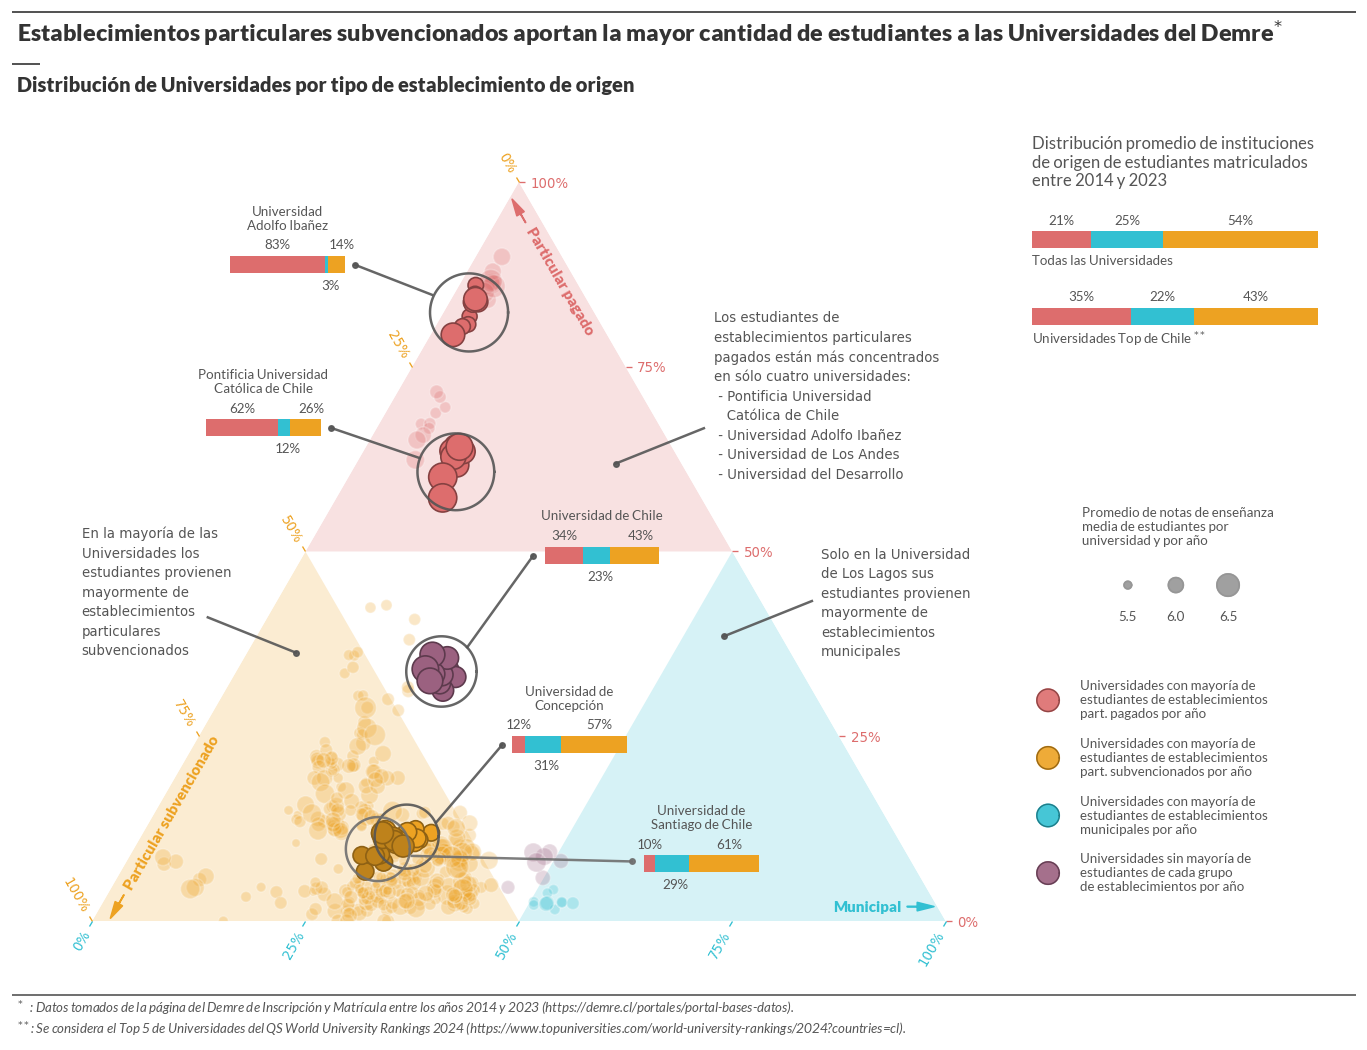

In [13]:
# Definicion de colores
col_blue_1 = (20,110,160,255)
col_cyan_1 = (50,192,210,255)
col_yellow_1 = (224,177,101,255)
col_wine_1 = (151,60,76,255)
col_green_1 = (0,150,158,255)
col_wine_2 = (171,138,149,255)

col_salmon_1 = (221,109,109,255)
col_yellow_2 = (237,162,34,255)
col_green_2 = (180,187,60,255)
col_wine_3 = (155,97,128,255)
col_gray_1 = (130,129,116,255)
col_blue_2 = (0,89,124,255)
aaa = 150
col_black = (51,51,51,255)
col_gray_text = (85,85,85,255)
col_gray = (aaa,aaa,aaa,255)

color_gen = col_wine_3#(171, 117, 250, 255)
color_pp1 = col_salmon_1#(219, 142, 116, 255)
color_ps1 = col_yellow_2#(227, 222, 102, 255)
color_mun1 = col_cyan_1#(116, 219, 195, 255)

colorGen_1 = tuple([i/255 for i in color_gen]) #my_gradient(0.25)
colorPP_1 = tuple([i/255 for i in color_pp1]) #my_gradient(0.7)
colorMun_1 = tuple([i/255 for i in color_mun1]) #my_gradient(0.5)
colorPS_1 = tuple([i/255 for i in color_ps1])# my_gradient(0.999)

colorBlack = tuple([i/255 for i in col_black])
colorGrayText = tuple([i/255 for i in col_gray_text])
colorGray = tuple([i/255 for i in col_gray])

fig, ax = plt.subplots(1,figsize=(10,8), dpi=120)
draw_fig_colors(fig, ax, colorGen_1, colorPP_1, colorMun_1, colorPS_1, colorBlack, colorGrayText, colorGray)

## Alternativa 2

In [162]:
df_admision_matricula_adj_2 = df_admision_matricula.copy()
df_admision_matricula_adj_2['PROMEDIO_NOTAS_pp'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS'] * df_admision_matricula_adj_2['Particular pagado']
df_admision_matricula_adj_2['PROMEDIO_NOTAS_mun'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS'] * df_admision_matricula_adj_2['Municipal']
df_admision_matricula_adj_2['PROMEDIO_NOTAS_ps'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS'] * df_admision_matricula_adj_2['Particular subvencionado']

cols_df_adj_2 = ['PROMEDIO_NOTAS', 'Particular pagado', 'Municipal', 'Particular subvencionado', 'PROMEDIO_NOTAS_pp', 'PROMEDIO_NOTAS_mun', 'PROMEDIO_NOTAS_ps']
df_admision_matricula_adj_2 = df_admision_matricula_adj_2.groupby(['UNIVERSIDAD', 'AÑO'], as_index=False)[cols_df_adj_2].agg(['sum', 'mean'])
df_admision_matricula_adj_2.columns = ['_'.join(col).strip() for col in df_admision_matricula_adj_2.columns.values]

df_admision_matricula_adj_2['PROMEDIO_NOTAS_pp_mean'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS_pp_sum'] / df_admision_matricula_adj_2['Particular pagado_sum']
df_admision_matricula_adj_2['PROMEDIO_NOTAS_mun_mean'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS_mun_sum'] / df_admision_matricula_adj_2['Municipal_sum']
df_admision_matricula_adj_2['PROMEDIO_NOTAS_ps_mean'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS_ps_sum'] / df_admision_matricula_adj_2['Particular subvencionado_sum']
df_admision_matricula_adj_2 = df_admision_matricula_adj_2.rename(columns={'AÑO_': 'AÑO', 'UNIVERSIDAD_': 'UNIVERSIDAD'})

df_admision_matricula_adj_2 = df_admision_matricula_adj_2.sort_values('PROMEDIO_NOTAS_mean', ascending=False)
df_admision_matricula_adj_2 = df_admision_matricula_adj_2.pivot(index='UNIVERSIDAD', columns='AÑO', values='PROMEDIO_NOTAS_mean').dropna().sort_values(2023, ascending=True)
df_admision_matricula_adj_2.head()

AÑO,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
UNIVERSIDAD,,,,,,,,,,
UNIVERSIDAD TECNOLOGICA METROPOLITANA,5.542024,5.579490,5.595352,5.617906,5.606273,5.616627,5.614287,5.691193,5.793830,5.796069
UNIVERSIDAD ALBERTO HURTADO,5.612556,5.614052,5.670700,5.615355,5.616004,5.653683,5.675557,5.775403,5.902102,5.847870
UNIVERSIDAD DE PLAYA ANCHA,5.668521,5.696642,5.676893,5.692594,5.725679,5.725680,5.763904,5.805429,5.872994,5.908241
UNIVERSIDAD METROPOLITANA DE CIENCIAS DE LA EDUCACION,5.792616,5.802635,5.795585,5.783697,5.835118,5.809670,5.844396,5.886066,5.945291,5.928220
UNIVERSIDAD DE LOS LAGOS,5.646598,5.655000,5.659729,5.673020,5.652206,5.666622,5.722507,5.846743,5.939530,5.982630


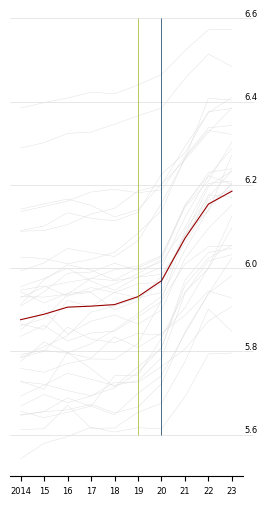

In [396]:
año_th=2020
df_admision_matricula_adj_2 = df_admision_matricula_adj_2.sort_values(2023)

gradient_blue = mod_color_op(my_gradient(0.15), intensidad=1., alpha=1.)
gradient_yellow = mod_color_op(my_gradient(0.7), intensidad=1., alpha=1.)
gradient_green = mod_color_op(my_gradient(0.57), intensidad=1., alpha=1.)
gradient_red = mod_color_op(my_gradient(0.999), intensidad=1., alpha=1.)

fig, ax = plt.subplots(1, figsize=(3,6))

ax.plot(df_admision_matricula_adj_2.T, color='#dddddd', linewidth=0.3)
ax.plot(df_admision_matricula_adj_2.T.mean(1), color=gradient_red, linewidth=0.8)
ax.vlines(2020,
          ymin=5.6,
          ymax=6.6,
          color=gradient_blue, linewidth=0.5
          )
ax.vlines(2019,
          ymin=5.6,
          ymax=6.6,
          color=gradient_green, linewidth=0.5
          )
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(df_admision_matricula_adj_2.columns)
ax.set_xticklabels([2014,15,16,17,18,19,20,21,22,23], fontsize=6)
ax.set_yticks([5.6, 5.8, 6.0, 6.2, 6.4, 6.6])
ax.set_yticklabels([5.6, 5.8, 6.0, 6.2, 6.4, 6.6], fontsize=6,)
ax.yaxis.tick_right()
ax.tick_params(axis='y', length=7, width=0.5, color='#dddddd')
for tick in ax.get_yticklabels():
    tick.set_horizontalalignment('right')  # Alineación horizontal centrada
    tick.set_verticalalignment('bottom')  # Alineación vertical sobre el tick

ax.grid(axis='y', color='#dddddd', linestyle='-', linewidth=0.5)
ax.set_ylim(5.5, 6.61)
plt.show()

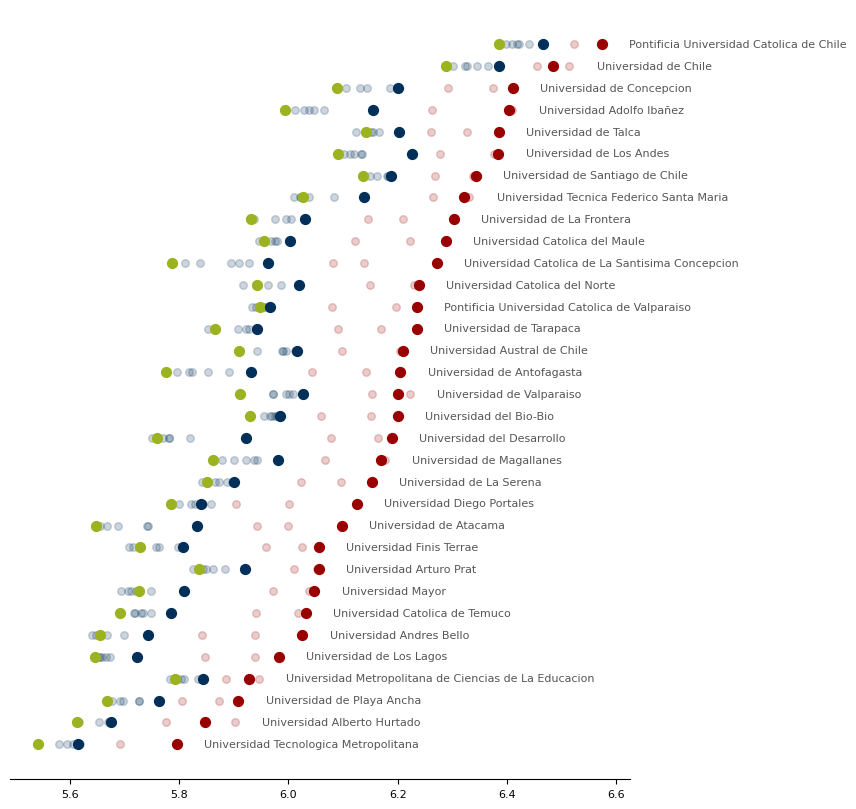

In [393]:
fig, ax = plt.subplots(1, figsize=(8,10))
pos_año = df_admision_matricula_adj_2.columns.tolist().index(año_th)

for i in df_admision_matricula_adj_2.columns[1:pos_año]:
    ax.scatter(df_admision_matricula_adj_2[i], df_admision_matricula_adj_2.index, color=gradient_blue, alpha=0.2, s=30)

for i in range(df_admision_matricula_adj_2.shape[0]):
    ax.text(df_admision_matricula_adj_2.iloc[i].max()+0.05, i,
            df_admision_matricula_adj_2.iloc[i].name.title().replace('De ', 'de ').replace('Del ', 'del '),
            ha='left', va='center', fontsize=8, color=colorGrayText)

for i in df_admision_matricula_adj_2.columns[(pos_año+1):-1]:
    ax.scatter(df_admision_matricula_adj_2[i], df_admision_matricula_adj_2.index, color=gradient_red, alpha=0.2, s=30)

ax.scatter(df_admision_matricula_adj_2[2014], df_admision_matricula_adj_2.index, color=gradient_green, s=50)
ax.scatter(df_admision_matricula_adj_2[año_th], df_admision_matricula_adj_2.index, color=gradient_blue, s=50)
ax.scatter(df_admision_matricula_adj_2[2023], df_admision_matricula_adj_2.index, color=gradient_red, s=50)

ax.set_xticks([5.6, 5.8, 6.0, 6.2, 6.4, 6.6])
ax.set_xticklabels([5.6, 5.8, 6.0, 6.2, 6.4, 6.6], fontsize=8)
ax.set_yticklabels([])
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

## Alternativa 3

In [14]:
df_admision_matricula_adj = df_admision_matricula.copy()
df_admision_matricula_adj['PROMEDIO_NOTAS_pp'] = df_admision_matricula_adj['PROMEDIO_NOTAS'] * df_admision_matricula_adj['Particular pagado']
df_admision_matricula_adj['PROMEDIO_NOTAS_mun'] = df_admision_matricula_adj['PROMEDIO_NOTAS'] * df_admision_matricula_adj['Municipal']
df_admision_matricula_adj['PROMEDIO_NOTAS_ps'] = df_admision_matricula_adj['PROMEDIO_NOTAS'] * df_admision_matricula_adj['Particular subvencionado']

cols_df_adj = ['Particular pagado', 'Municipal', 'Particular subvencionado', 'PROMEDIO_NOTAS_pp', 'PROMEDIO_NOTAS_mun', 'PROMEDIO_NOTAS_ps']
df_admision_matricula_adj = df_admision_matricula_adj.groupby(['UNIVERSIDAD', 'AÑO'], as_index=False)[cols_df_adj].agg(['sum', 'mean'])

df_admision_matricula_adj.columns = ['_'.join(col).strip() for col in df_admision_matricula_adj.columns.values]
df_admision_matricula_adj['PROMEDIO_NOTAS_pp_mean'] = df_admision_matricula_adj['PROMEDIO_NOTAS_pp_sum'] / df_admision_matricula_adj['Particular pagado_sum']
df_admision_matricula_adj['PROMEDIO_NOTAS_mun_mean'] = df_admision_matricula_adj['PROMEDIO_NOTAS_mun_sum'] / df_admision_matricula_adj['Municipal_sum']
df_admision_matricula_adj['PROMEDIO_NOTAS_ps_mean'] = df_admision_matricula_adj['PROMEDIO_NOTAS_ps_sum'] / df_admision_matricula_adj['Particular subvencionado_sum']
df_admision_matricula_adj = df_admision_matricula_adj.rename(columns={'AÑO_': 'AÑO', 'UNIVERSIDAD_': 'UNIVERSIDAD'})

df_admision_matricula_adj = df_admision_matricula_adj[['AÑO', 'UNIVERSIDAD', 'Particular pagado_sum', 'Particular pagado_mean', 'Municipal_sum', 'Municipal_mean', 
                                                       'Particular subvencionado_sum', 'Particular subvencionado_mean', 'PROMEDIO_NOTAS_pp_mean', 'PROMEDIO_NOTAS_mun_mean', 'PROMEDIO_NOTAS_ps_mean']]

In [15]:
df_admision_matricula_adj.head()

,AÑO,UNIVERSIDAD,Particular pagado_sum,Particular pagado_mean,Municipal_sum,Municipal_mean,Particular subvencionado_sum,Particular subvencionado_mean,PROMEDIO_NOTAS_pp_mean,PROMEDIO_NOTAS_mun_mean,PROMEDIO_NOTAS_ps_mean
0,2014,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,2915,0.632733,502,0.108965,1190,0.258303,6.418446,6.270996,6.349874
1,2015,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,2988,0.642028,490,0.105286,1176,0.252686,6.434023,6.280286,6.354626
2,2016,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,3060,0.636042,497,0.103305,1254,0.260653,6.445696,6.302495,6.360758
3,2017,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,3184,0.636673,553,0.110578,1264,0.252749,6.463408,6.319421,6.365625
4,2018,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,3205,0.616939,618,0.118961,1372,0.264100,6.465254,6.316634,6.356778


<Axes: xlabel='AÑO'>

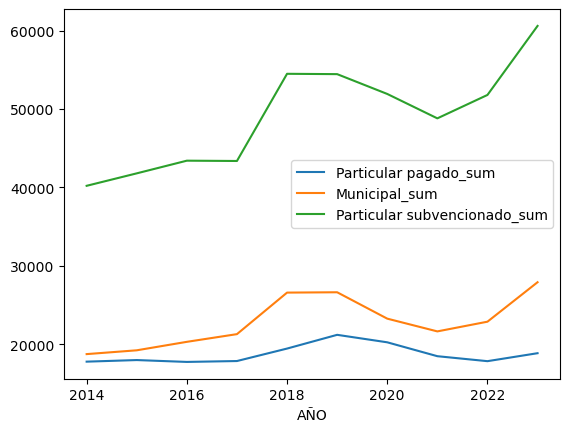

In [16]:
df_admision_matricula_adj.groupby('AÑO')[['Particular pagado_sum', 'Municipal_sum', 'Particular subvencionado_sum']].sum(numeric_only=True).plot()

<Axes: xlabel='AÑO'>

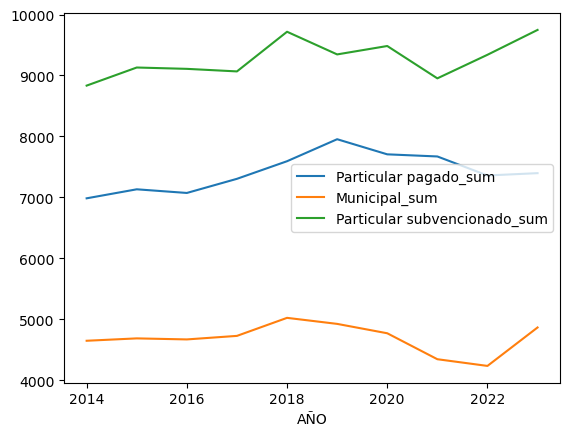

In [17]:
uni_top = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE CHILE', 'UNIVERSIDAD DE CONCEPCION', 'UNIVERSIDAD ADOLFO IBAÑEZ', 'UNIVERSIDAD DE SANTIAGO DE CHILE']
df_admision_matricula_adj[df_admision_matricula_adj['UNIVERSIDAD'].isin(uni_top)].groupby('AÑO')[['Particular pagado_sum', 'Municipal_sum', 'Particular subvencionado_sum']].sum(numeric_only=True).plot()

<Axes: xlabel='AÑO'>

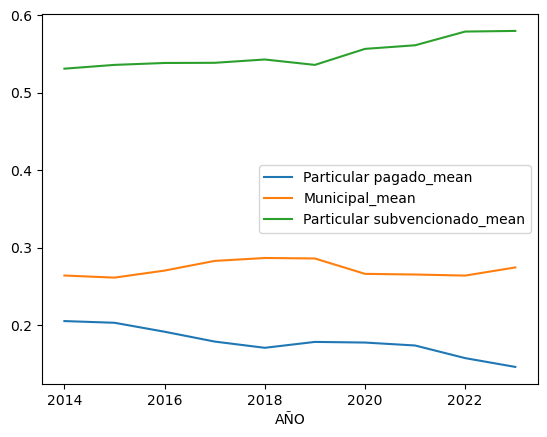

In [18]:
df_admision_matricula_adj.groupby('AÑO')[['Particular pagado_mean', 'Municipal_mean', 'Particular subvencionado_mean']].mean(numeric_only=True).plot()

<Axes: xlabel='AÑO'>

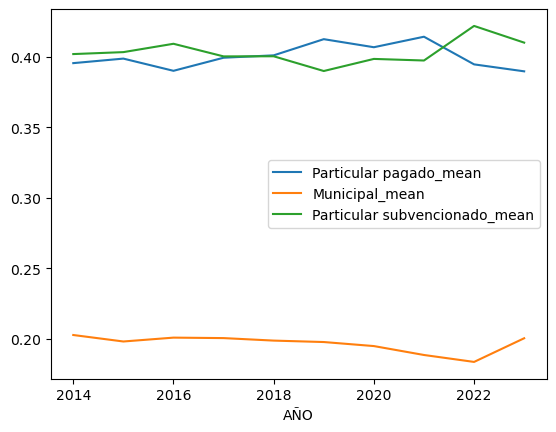

In [19]:
df_admision_matricula_adj[df_admision_matricula_adj['UNIVERSIDAD'].isin(uni_top)].groupby('AÑO')[['Particular pagado_mean', 'Municipal_mean', 'Particular subvencionado_mean']].mean(numeric_only=True).plot()

<Axes: xlabel='AÑO', ylabel='PROMEDIO_NOTAS_pp_mean'>

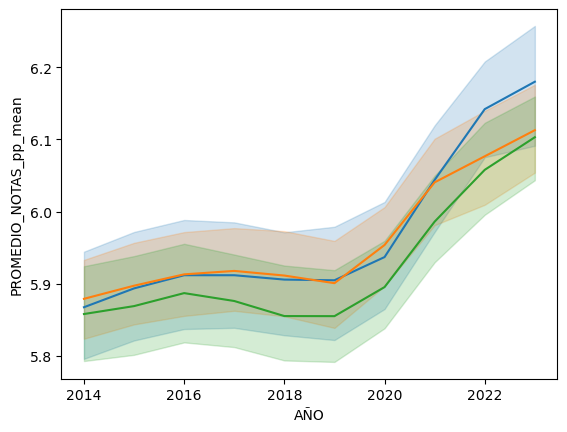

In [28]:
sns.lineplot(x = "AÑO", y = "PROMEDIO_NOTAS_pp_mean", data = df_admision_matricula_adj)#, estimator = "mean")
sns.lineplot(x = "AÑO", y = "PROMEDIO_NOTAS_mun_mean", data = df_admision_matricula_adj)#, estimator = "mean")
sns.lineplot(x = "AÑO", y = "PROMEDIO_NOTAS_ps_mean", data = df_admision_matricula_adj)#, estimator = "mean")

<Axes: xlabel='AÑO', ylabel='PROMEDIO_NOTAS_pp_mean'>

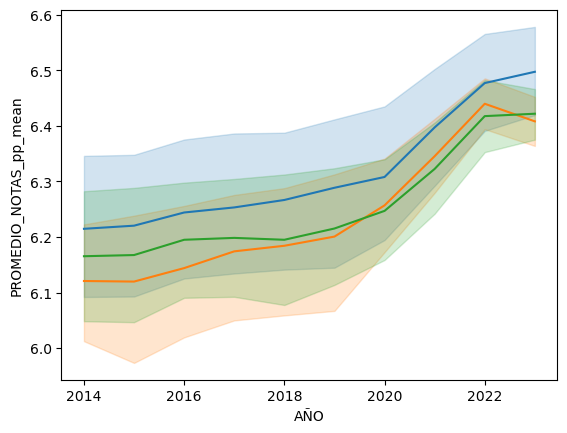

In [21]:
sns.lineplot(x = "AÑO", y = "PROMEDIO_NOTAS_pp_mean", data = df_admision_matricula_adj[df_admision_matricula_adj['UNIVERSIDAD'].isin(uni_top)], estimator = "mean")
sns.lineplot(x = "AÑO", y = "PROMEDIO_NOTAS_mun_mean", data = df_admision_matricula_adj[df_admision_matricula_adj['UNIVERSIDAD'].isin(uni_top)], estimator = "mean")
sns.lineplot(x = "AÑO", y = "PROMEDIO_NOTAS_ps_mean", data = df_admision_matricula_adj[df_admision_matricula_adj['UNIVERSIDAD'].isin(uni_top)], estimator = "mean")

<Axes: >

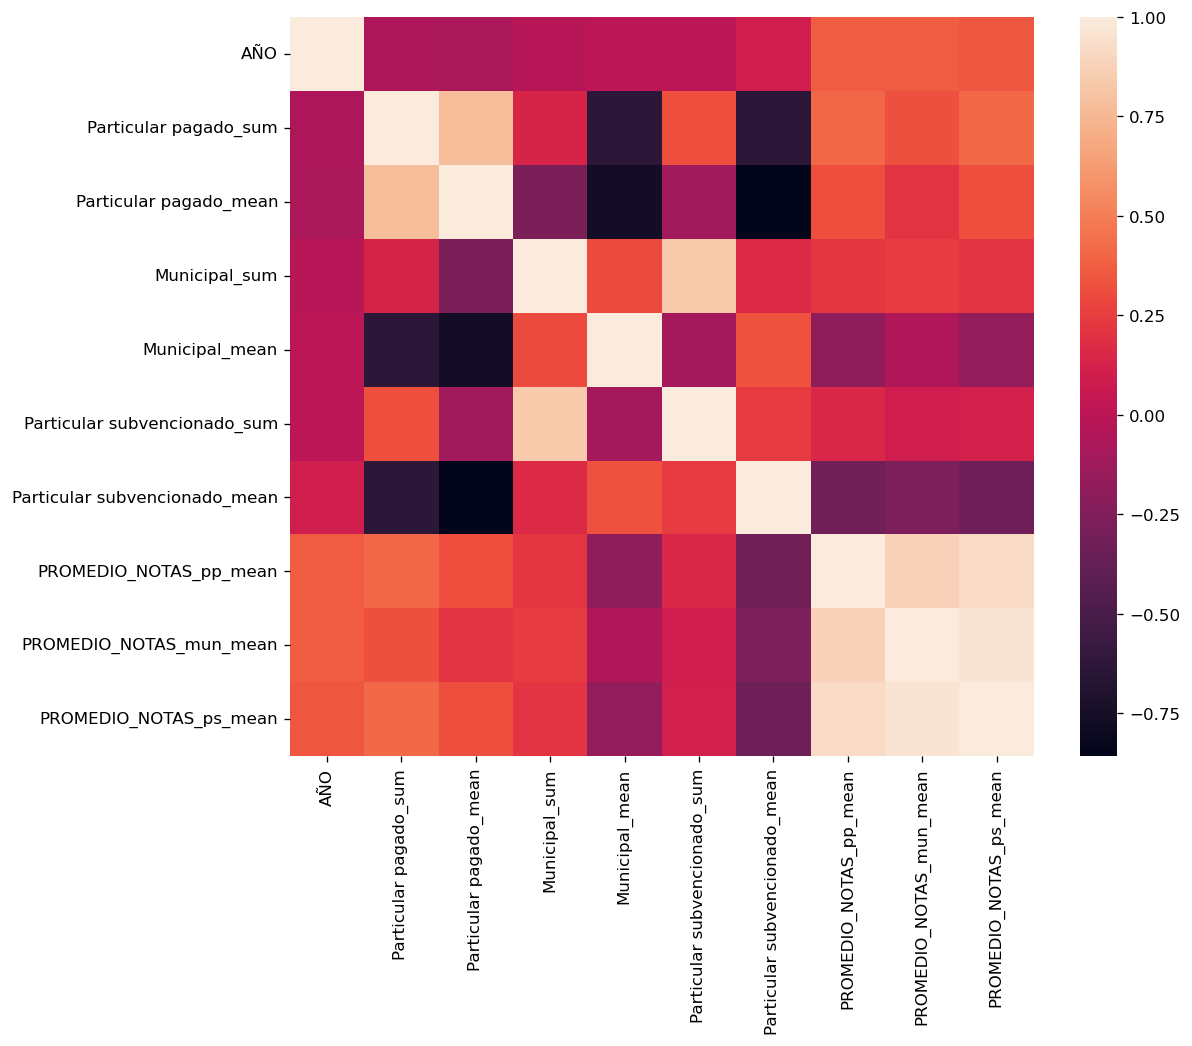

In [22]:
fig, ax = plt.subplots(1,figsize=(10,8), dpi=120)
sns.heatmap(df_admision_matricula_adj.dropna().corr(numeric_only=True), ax=ax)

In [39]:
df_admision_matricula_adj_3y.sort_values('PM_pp_quiebre', ascending=False)[['PM_pp_2014', 'PM_pp_2019', 'PM_pp_2023']].T

UNIVERSIDAD,UNIVERSIDAD CATOLICA DE TEMUCO,UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION,UNIVERSIDAD DE ANTOFAGASTA,UNIVERSIDAD DE LOS LAGOS,UNIVERSIDAD DE TARAPACA,UNIVERSIDAD DEL BIO-BIO,UNIVERSIDAD DE LA SERENA,UNIVERSIDAD ANDRES BELLO,UNIVERSIDAD MAYOR,UNIVERSIDAD DEL DESARROLLO,...,UNIVERSIDAD DE LOS ANDES,UNIVERSIDAD ALBERTO HURTADO,UNIVERSIDAD DE CONCEPCION,UNIVERSIDAD DE SANTIAGO DE CHILE,UNIVERSIDAD METROPOLITANA DE CIENCIAS DE LA EDUCACION,UNIVERSIDAD DE ATACAMA,UNIVERSIDAD TECNICA FEDERICO SANTA MARIA,UNIVERSIDAD DE CHILE,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD ARTURO PRAT
PM_pp_2014,0.800000,0.700000,1.100000,1.800000,2.300000,2.500000,1.600000,0.400000,2.900000,2.600000,...,1.700000,0.300000,1.400000,2.100000,3.000000,1.200000,3.100000,1.300000,0.000000,0.500000
PM_pp_2019,0.792571,0.915458,1.178232,1.909091,2.270707,2.683537,1.572940,0.515262,2.939962,2.662806,...,1.743993,0.353230,1.537704,2.111266,2.984459,1.371190,3.136301,1.380440,0.065426,0.885924
PM_pp_2023,1.354857,1.437869,1.668210,2.384385,2.736325,3.117035,1.974641,0.914606,3.320928,3.037687,...,1.989416,0.591217,1.750398,2.320456,3.180188,1.556978,3.307806,1.529849,0.210684,0.808295


In [54]:
df_admision_matricula_adj_3y[['PM_pp_2014', 'PM_pp_2019', 'PM_pp_2023']]

,PM_pp_2014,PM_pp_2019,PM_pp_2023
UNIVERSIDAD,,,
UNIVERSIDAD CATOLICA DE TEMUCO,0.0,-0.007429,0.554857
UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION,0.1,0.315458,0.837869
UNIVERSIDAD DE ANTOFAGASTA,0.2,0.278232,0.768210
UNIVERSIDAD DE LOS LAGOS,0.3,0.409091,0.884385
UNIVERSIDAD DE TARAPACA,0.4,0.370707,0.836325
UNIVERSIDAD DEL BIO-BIO,0.5,0.683537,1.117035
UNIVERSIDAD DE LA SERENA,0.6,0.572940,0.974641
UNIVERSIDAD ANDRES BELLO,0.7,0.815262,1.214606
UNIVERSIDAD MAYOR,0.8,0.839962,1.220928


In [64]:
df_admision_matricula_adj_3y['PM_pp_2014'].values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2])

In [84]:
df_admision_matricula_adj_3y.index

Index(['UNIVERSIDAD CATOLICA DE TEMUCO',
       'UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION',
       'UNIVERSIDAD DE ANTOFAGASTA', 'UNIVERSIDAD DE LOS LAGOS',
       'UNIVERSIDAD DE TARAPACA', 'UNIVERSIDAD DEL BIO-BIO',
       'UNIVERSIDAD DE LA SERENA', 'UNIVERSIDAD ANDRES BELLO',
       'UNIVERSIDAD MAYOR', 'UNIVERSIDAD DEL DESARROLLO',
       'UNIVERSIDAD CATOLICA DEL MAULE', 'UNIVERSIDAD DIEGO PORTALES',
       'PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO',
       'UNIVERSIDAD FINIS TERRAE', 'UNIVERSIDAD CATOLICA DEL NORTE',
       'UNIVERSIDAD DE MAGALLANES', 'UNIVERSIDAD ADOLFO IBAÑEZ',
       'UNIVERSIDAD DE TALCA', 'UNIVERSIDAD DE LA FRONTERA',
       'UNIVERSIDAD DE PLAYA ANCHA ', 'UNIVERSIDAD AUSTRAL DE CHILE',
       'UNIVERSIDAD TECNOLOGICA METROPOLITANA', 'UNIVERSIDAD DE VALPARAISO',
       'UNIVERSIDAD DE LOS ANDES', 'UNIVERSIDAD ALBERTO HURTADO',
       'UNIVERSIDAD DE CONCEPCION', 'UNIVERSIDAD DE SANTIAGO DE CHILE',
       'UNIVERSIDAD METROPOLITANA DE CIENCIAS D

In [93]:
df_admision_matricula_adj_3y[['PM_pp_2014', 'PM_pp_2019', 'PM_pp_2023']].T.iloc[0]

UNIVERSIDAD
UNIVERSIDAD CATOLICA DE TEMUCO                           0.0
UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION          0.1
UNIVERSIDAD DE ANTOFAGASTA                               0.2
UNIVERSIDAD DE LOS LAGOS                                 0.3
UNIVERSIDAD DE TARAPACA                                  0.4
UNIVERSIDAD DEL BIO-BIO                                  0.5
UNIVERSIDAD DE LA SERENA                                 0.6
UNIVERSIDAD ANDRES BELLO                                 0.7
UNIVERSIDAD MAYOR                                        0.8
UNIVERSIDAD DEL DESARROLLO                               0.9
UNIVERSIDAD CATOLICA DEL MAULE                           1.0
UNIVERSIDAD DIEGO PORTALES                               1.1
PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO            1.2
UNIVERSIDAD FINIS TERRAE                                 1.3
UNIVERSIDAD CATOLICA DEL NORTE                           1.4
UNIVERSIDAD DE MAGALLANES                                1.5
UNIVERSIDAD 

In [99]:
df_admision_matricula_adj_3y.shape

(33, 13)

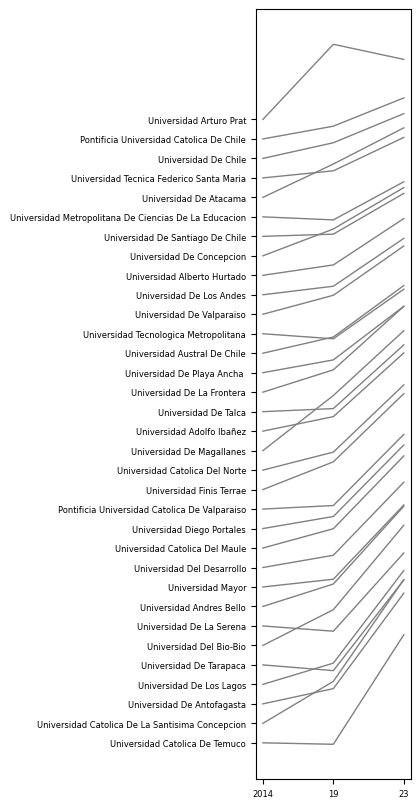

In [108]:
df_admision_matricula_adj_3y = df_admision_matricula_adj[df_admision_matricula_adj['AÑO'].isin([2014, 2019, 2023])][['AÑO', 'UNIVERSIDAD', 'PROMEDIO_NOTAS_pp_mean', 'PROMEDIO_NOTAS_mun_mean' ,'PROMEDIO_NOTAS_ps_mean']]
#df_admision_matricula_adj_3y = df_admision_matricula_adj[['AÑO', 'UNIVERSIDAD', 'PROMEDIO_NOTAS_pp_mean', 'PROMEDIO_NOTAS_mun_mean' ,'PROMEDIO_NOTAS_ps_mean']]

df_admision_matricula_adj_3y['AÑO'] = df_admision_matricula_adj_3y['AÑO'].astype(str)

df_admision_matricula_adj_3y = df_admision_matricula_adj_3y.pivot(index='UNIVERSIDAD', columns=['AÑO'], values=['PROMEDIO_NOTAS_pp_mean', 'PROMEDIO_NOTAS_mun_mean' ,'PROMEDIO_NOTAS_ps_mean']).dropna()

df_admision_matricula_adj_3y.columns = ['_'.join(col).strip() for col in df_admision_matricula_adj_3y.columns.values]
df_admision_matricula_adj_3y.columns = df_admision_matricula_adj_3y.columns.str.replace('PROMEDIO_NOTAS', 'PM').str.replace('mean_', '')


for est in ['PM_pp_', 'PM_mun_', 'PM_ps_']:
    for y in ['2023', '2019', '2014']:
        df_admision_matricula_adj_3y[est + y] = df_admision_matricula_adj_3y[est + y] - df_admision_matricula_adj_3y[est + '2014']
    df_admision_matricula_adj_3y[est+'quiebre'] = df_admision_matricula_adj_3y[est + '2023'] - df_admision_matricula_adj_3y[est + '2019']

df_admision_matricula_adj_3y = df_admision_matricula_adj_3y.sort_values('PM_pp_quiebre', ascending=False)
df_admision_matricula_adj_3y['uni_id'] = [k for k in range(df_admision_matricula_adj_3y.shape[0])]

for col in ['PM_pp_2014', 'PM_pp_2019', 'PM_pp_2023', 'PM_mun_2014', 'PM_mun_2019', 'PM_mun_2023', 'PM_ps_2014', 'PM_ps_2019', 'PM_ps_2023']:
    df_admision_matricula_adj_3y[col] = df_admision_matricula_adj_3y[col] + df_admision_matricula_adj_3y['uni_id'] * 0.1

fig, ax = plt.subplots(1, figsize=(2,10))
for i in range(df_admision_matricula_adj_3y.shape[0]):
    ax.plot(df_admision_matricula_adj_3y.iloc[i][['PM_pp_2014', 'PM_pp_2019', 'PM_pp_2023']], linewidth=1, color='gray')

ax.set_yticks(df_admision_matricula_adj_3y['PM_pp_2014'])
ax.set_yticklabels(df_admision_matricula_adj_3y.index.str.title(), fontsize=6)
ax.set_xticklabels(['2014', '19', '23'], fontsize=6)

plt.show()

In [73]:
df_admision_matricula_adj_3y

,PM_pp_2014,PM_pp_2019,PM_pp_2023,PM_mun_2014,PM_mun_2019,PM_mun_2023,PM_ps_2014,PM_ps_2019,PM_ps_2023,PM_pp_quiebre,PM_mun_quiebre,PM_ps_quiebre,uni_id
UNIVERSIDAD,,,,,,,,,,,,,
UNIVERSIDAD CATOLICA DE TEMUCO,0.0,-0.007429,0.554857,0.0,0.031558,0.285370,0.0,0.032825,0.363710,0.562286,0.253812,0.330885,0
UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION,0.1,0.315458,0.837869,0.1,0.292118,0.552259,0.1,0.201783,0.594071,0.522411,0.260141,0.392288,1
UNIVERSIDAD DE ANTOFAGASTA,0.2,0.278232,0.768210,0.2,0.359905,0.579879,0.2,0.281306,0.633945,0.489978,0.219974,0.352638,2
UNIVERSIDAD DE LOS LAGOS,0.3,0.409091,0.884385,0.3,0.324766,0.598813,0.3,0.301162,0.662041,0.475294,0.274047,0.360879,3
UNIVERSIDAD DE TARAPACA,0.4,0.370707,0.836325,0.4,0.460682,0.681763,0.4,0.471191,0.808508,0.465618,0.221081,0.337317,4
UNIVERSIDAD DEL BIO-BIO,0.5,0.683537,1.117035,0.5,0.573445,0.738903,0.5,0.528575,0.785026,0.433498,0.165458,0.256451,5
UNIVERSIDAD DE LA SERENA,0.6,0.572940,0.974641,0.6,0.582587,0.851012,0.6,0.645534,0.908828,0.401701,0.268425,0.263294,6
UNIVERSIDAD ANDRES BELLO,0.7,0.815262,1.214606,0.7,0.724041,0.988890,0.7,0.725826,1.043054,0.399343,0.264849,0.317228,7
UNIVERSIDAD MAYOR,0.8,0.839962,1.220928,0.8,0.823243,1.105930,0.8,0.805496,1.111528,0.380966,0.282688,0.306032,8


<Axes: >

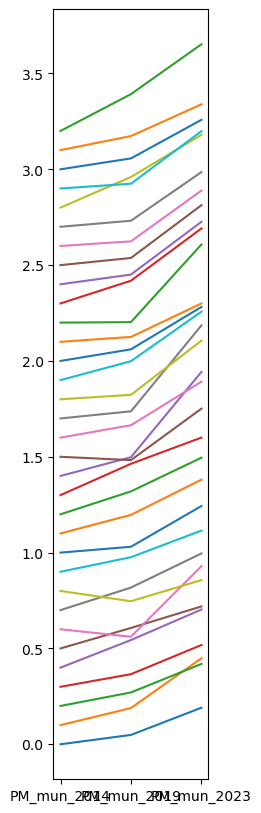

In [24]:
df_admision_matricula_adj_3y[['PM_mun_2014', 'PM_mun_2019', 'PM_mun_2023']].T.plot(legend=False,figsize=(2, 10))

<Axes: >

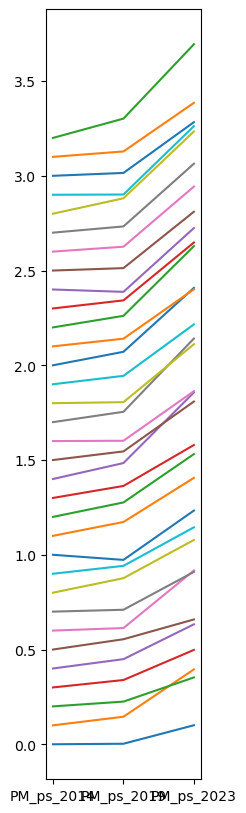

In [25]:
df_admision_matricula_adj_3y[['PM_ps_2014', 'PM_ps_2019', 'PM_ps_2023']].T.plot(legend=False,figsize=(2, 10))

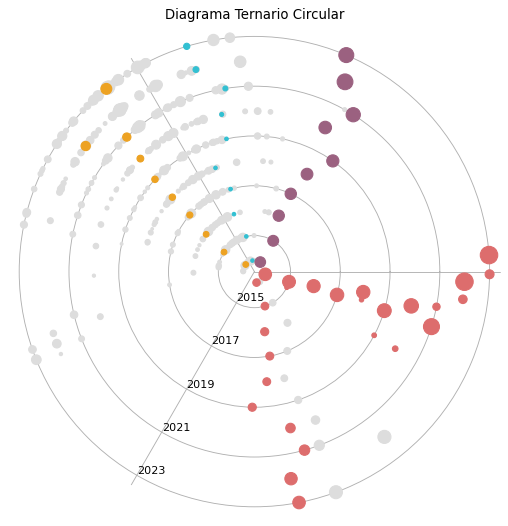

In [26]:
# Datos de ejemplo (A, B, C) que suman 1
#data = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
#    .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

# Convertir las tripletas a ángulos (en radianes)
# Puedes asignar a cada eje (A, B, C) un ángulo, por ejemplo: A -> 0°, B -> 120°, C -> 240°
angles = np.array([0, -2*np.pi/3, 4*np.pi/3])

# Función para proyectar en coordenadas polares
def ternary_to_polar(triplet):
    return np.dot(triplet, angles)

def scatter_ternary(data_angles, data_radius, ax, color, size):
    polar_angles = np.apply_along_axis(ternary_to_polar, 1, data_angles)
    ax.scatter(polar_angles, data_radius, color=color, s=size)

# Graficar en coordenadas polares
fig = plt.figure(figsize=(10,8), dpi=80)
ax = fig.add_subplot(111, polar=True)

ax.set_thetagrids(range(0, 360, 120), labels=[]) 
ax.set_rgrids([k*2 for k in range(7)], angle=-120, labels=[k*2 +2013 if k>0 else "" for k in range(7)]) 
ax.set_axisbelow(True)

uni = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE LA FRONTERA', 'UNIVERSIDAD DEL DESARROLLO', 'UNIVERSIDAD DE LOS ANDES', 'UNIVERSIDAD DE LOS LAGOS', 'UNIVERSIDAD DE CHILE']
col_uni = [
    rgba_to_hex(colorPP_1),
    rgba_to_hex(colorPS_1), 
    rgba_to_hex(colorPP_1), 
    rgba_to_hex(colorPP_1), 
    rgba_to_hex(colorMun_1), 
    rgba_to_hex(colorGen_1), 
    ]

data_angles = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
    .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

data_radius = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['AÑO']-2013
data_size = df_admision_matricula_group[~df_admision_matricula_group['UNIVERSIDAD'].isin(uni)]['PROMEDIO_NOTAS']-5

scatter_ternary(data_angles, data_radius, ax, color='#dddddd', size=np.exp(data_size*3.5))

for k in range(len(uni)):
    data_angles = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]][['Municipal', 'Particular pagado', 'Particular subvencionado']]\
        .apply(lambda x: (x['Municipal'], x['Particular pagado'], x['Particular subvencionado']), axis=1).tolist()

    data_radius = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]]['AÑO']-2013
    data_size = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]]['PROMEDIO_NOTAS']-5

    scatter_ternary(data_angles, data_radius, ax, color=col_uni[k], size=np.exp(data_size*3.5))


ax.set_title("Diagrama Ternario Circular")

ax.spines[:].set_visible(False)

# Mostrar gráfico
plt.show()